# Introducing the JASMIN Notebook Service

In this Notebook, we will discuss:

1. What is a Notebook?
2. Using Python in the browser 
3. Plotting in a Notebook
4. Working with data in the CEDA Archive
5. Accessing data in Group Workspaces
6. Creating virtual environments to install additional software
7. Sharing Notebooks

## 1. What is a Jupyter Notebook?

A Notebook is an interactive programming environment that runs in a web-browser. Put simply, a Notebook allows you to:
- Define, edit and run code (in Python)
- Embed visualisations within your code to demonstrate what it does
- Include notes to document your workflow
- Share your work with others (e.g. via GitHub)

We will demonstrate some Notebook behaviour here, and you will see how they can be used.

For more information, see the "Help" tab above, or:

 - JASMIN Notebook Help: https://help.jasmin.ac.uk/article/4851-jasmin-notebook-service#what-is-a-jupyter-notebook
 - Intro to Jupyter Lab: https://jupyter.org/
 - Try a Jupyter Lab Notebook in your browser: https://jupyter.org/try
   - NOTE: The above is _not_ a JASMIN service.

### Why use the JASMIN Notebook Service (rather than another)?

Many of you will have used Jupyter Notebooks elsewhere. So why use the JASMIN Notebook Service? Here are some reasons why:

 1. It uses your JASMIN "login" account:
   - your `$HOME` directory is the same as an SSH terminal session on JASMIN.
 2. You can read the CEDA archive directly:
   - `/badc/` and `/neodc` are visible
   - you can view the same data sets as you can via an SSH session
 3. You can read from Group Workspaces:
   - your Notebook can see all Group Workspaces that your JASMIN account has access to
 4. The common JASMIN software is available:
   - the "jaspy" packages are installed in the Python3.7 environment
     - see: https://help.jasmin.ac.uk/article/4729-jaspy-envs
 5. You can install additional packages to extend your Notebook environments

**You can find the JASMIN Notebook Service here:**
https://notebooks.jasmin.ac.uk/

## 2. Using Python in the browser

The main feature of Notebooks is that you can _run_ code in your browser\*. **Let's take a look.**

*NOTE: the code doesn't really run in the browser!

In [9]:
print('hello')
# Then press: Shift+Enter - which executes the cell and move to the next one.
#                           If there isn't one below, it creates a new one for you.
# Or press:   Ctrl+Enter  - which executes the cell (and stays focussed on the current cell).
#
# Or press:   Alt+Enter   - which executes the cell and creates a new one for you.

hello


In [10]:
# In fact, you don't need "print"
'hello'

'hello'

You can include any Python that you might run in a script or interactive session...

In [11]:
ZERO = 273.15

def convert_temp(celsius):
    """
    Convert temperature (celsius) to temperature (kelvin).
    
    Return: temperature in Kelvin
    """
    kelvin = celsius + ZERO
    return kelvin

Having defined a function, we can call it later in the Notebook:

In [12]:
if convert_temp(0) != 273.15:
    'That function is bad'
else:
    print('It works!')

It works!


NOTE: we can't run a function in a cell that hasn't been run yet...


In [13]:
say_hello()

NameError: name 'say_hello' is not defined

In [14]:
def say_hello():
    print('Hello :-)')

Now we have defined it, we can run it:

In [15]:
say_hello()

Hello :-)


**IMPORTANT: Each time you run a Notebook you need to execute all cells in order if you want them all to run. Just like any other programme, you must _do things in a logical order_!**

### Let's make it more exciting

Try importing a module from the Python standard library:


In [16]:
import math
math.pi

3.141592653589793

What about importing a package provided via Jaspy?

In [17]:
import pandas as pd
df = pd.DataFrame({'name': ['jen', 'ken', 'pen'], 'age': [22, 33, 44]})

Another really cool thing about Notebooks is that they can render content from some packages, `pandas` being one of them.

In [18]:
# Display the contents of the Pandas DataFrame
df

,name,age
0,jen,22
1,ken,33
2,pen,44


### You can even run Shell commands!

Jupyter Notebooks are so clever - you can even run commands in the Linux Shell, by starting the code line with an exclamation mark `!`.

In [19]:
!pwd

/home/users/astephen/ceda-notebooks/notebooks/intro


In [20]:
!ls -l

total 49
-rw-r--r-- 1 astephen users   269 Jun 17 11:01 README.md
-rw-r--r-- 1 astephen users  3161 Jun 17 11:13 notebook-tour-part-1.ipynb
-rw-r--r-- 1 astephen users  5635 Jun 17 11:13 notebook-tour-part-2.ipynb
-rw-r--r-- 1 astephen users  1618 Jun 17 11:15 notebook-tour-part-3.ipynb
-rw-r--r-- 1 astephen users  3813 Jun 17 11:16 notebook-tour-part-4.ipynb
-rw-r--r-- 1 astephen users  2706 Jun 17 11:16 notebook-tour-part-5.ipynb
-rw-r--r-- 1 astephen users  5333 Jun 17 11:17 notebook-tour-part-6.ipynb
-rw-r--r-- 1 astephen users  2932 Jun 17 11:15 notebook-tour-part-7.ipynb
-rw-r--r-- 1 astephen users 21635 Jul 29 13:14 notebook-tour.ipynb


## 3. Plotting in a Notebook

Wouldn't it be great if you could view plots in a Notebook? Well, you can, using `matplotlib` and libraries that interact with it.

In [21]:
import matplotlib.pyplot as plt

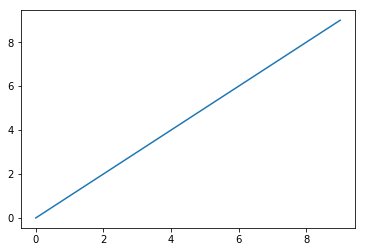

In [22]:
plt.plot(range(10))

## 4. Working with data in the CEDA archive

Now we know it is possible to import software libraries, write code, annotate it and generate visualisations - let's look at some real data. 

**The JASMIN Notebook Service can automatically see the CEDA archive.** This means that you can access any of the data sets that you would normally have access to when logged into JASMIN.

The CEDA archive lives under the directories:

`/badc/`
`/neodc/`

You can find out more about CEDA data sets, and their access rules, in our catalogue:

https://catalogue.ceda.ac.uk

### Plotting some CMIP6 data

Let's demonstrate plotting some data from the CMIP6 project.

In [23]:
import xarray as xr
fpath = '/badc/cmip6/data/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/' \
    'tas/gn/v20190927/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_095001-099912.nc'

ds = xr.open_dataset(fpath)

/opt/jaspy/lib/python3.7/site-packages/xarray/conventions.py:362: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim)


In [24]:
ds

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 600)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 0950-01-15 12:00:00 ... 0999-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          hybrid
    branch_time_in_child:   -182500.0
    branch_time_in_parent:  182865.0
    case_id:                46
    cesm_casename:          b.e21.BCO2x4cmip6.f09_g17.CMIP6-abrupt4xCO2.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-09-20T22:44:50Z
    data_specs_version:     01.00.31
    experiment:             abr

In [25]:
layer = ds.tas.sel(time='0999-12-15T12:00:00').squeeze()
layer.shape

(192, 288)

### Let's plot the near-surface air temperature

We want to plot the temperature over the whole globe.

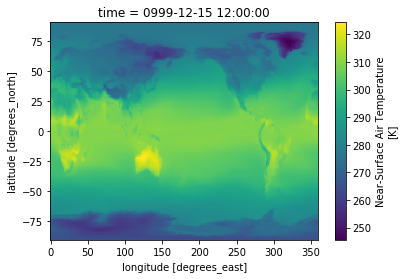

In [26]:
import matplotlib.pyplot as plt

layer.plot()
plt.show()

Now we will focus in on Africa using the Plate Carree projection projection, adding in coastlines and borders.

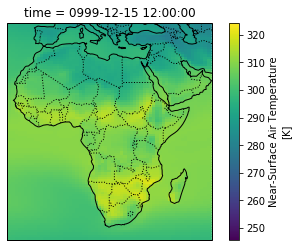

In [27]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines()

layer.plot()
plt.show()

## 5. Accessing data in Group Workspaces

On JASMIN, many project share data internally using large disk allocations known as Group Workspaces (GWSs). Your JASMIN Notebook session has _read access_ to any GWSs that you can normally access via an SSH session.

For example:

In [ ]:
import pandas as pd

fpath = '/gws/nopw/j04/cedaproc/public-data/uk_max_temp.txt'
df = pd.read_csv(fpath, sep='\s+', header=6, index_col='Year')

This is a Pandas DataFrame, let's take a look at the first few rows

In [ ]:
df.head(3)

In [ ]:
# Select January and July
jj = df.loc[:, ['JAN', 'JUL']]
jj.head(5)

And we can plot it:

In [ ]:
ax = jj.plot(title='January vs July maximum temp records (degC)')
ax.set_ylabel('Max Temp (degC)')

## 6. Creating virtual environments to install software

The JASMIN Notebook Service provides a _fixed_ Python3 software environment. This will be updated from time to time but may not be as dynamic as some users require.

If you need to add extra software to the environment you can do so - using Python's `virtual environments`. Here's how you can do it...

### Creating and using a Virtual Environment inside an existing Notebook

This Notebook demonstrates how you can use the Python `virtualenv` and `pip` packages to work with a Virtual Environment (`venv`) _inside_ an existing Notebook.

There are 3 steps:
 1. Create a venv - only required once
 2. Activate the venv - required any time you want to use the venv
 3. Install extra packages - whenever you need to add a new package
 
**NOTE: these instructions suggest putting all venvs that are used in Notebooks under a `~/nb-venvs/` directory. These venvs will _not_ work if you are logged directly into JASMIN via SSH.**

#### Step 1 - create a venv

You only need to create a venv once. In this example an `nb-venvs` directory is created inside the `$HOME` directory, and the venv is created inside it.

In [ ]:
# Import the required packages
import os

# Change current working directory to top of the repository: ~/ceda-notebooks/
os.chdir('../../..')

from scripts.utils import venv_utils

# Define the name of the venv to install virtual environments
venv_name = 'venv_notebook'

Since you only need to create the virtual environment once, the create method will check for it's existence

In [ ]:
# Create the venv
venv_utils.create_venv(venv_name=venv_name)

#### Step 2 - activate the venv

Use the activate method to add the venv to your notebook and use packages installed in the venv.

In [ ]:
# Activate the venv
venv_utils.activate_venv(venv_name=venv_name)

#### Step 3 - install a new package

In this case, we install the `fixnc` package from the PyPI repository using the install package method

In [ ]:
# First let's assert that we cannot import `fixnc`
try:
    import fixnc
except ModuleNotFoundError as err:
    print('Failed to import "fixnc" as expected')

In [ ]:
# Install the package
venv_utils.install_package('fixnc', venv_name=venv_name)

If we wanted to install more than one package, the `install_packages` method is more convenient.
Put the packages into a list and use the list in the method.

In [ ]:
packages = ["fixnc"]
venv_utils.install_packages(packages=packages, venv_name=venv_name)

Demonstrate it works, by importing it and finding out where the module has been installed.

In [ ]:
import fixnc
print(fixnc.__file__)

## 7. Sharing Notebooks

When you have produced a useful Notebook, it is a great idea to:
1. Put it into a version control system so that it is safe (and versioned)
2. Share it with your colleagues and collaborators

We recommend using GitHub for this. 

### Using GitHub repositories to store and share Notebooks

GitHub is an awesome website and collection of tools that allows you to manage, release and share code.

It uses Git, a distributed version control system, that we thoroughly recommend - see our webinar on the subject:

https://www.ceda.ac.uk/events/introduction-to-git-and-github/

#### How to get started

Firstly, create a GitHub user account:

https://github.com/

Then create your own repository:

https://github.com/new

Then _clone_ it locally, which you can even do inside a Notebook (using the exclamation mark to call out to the Linux Shell):

In [ ]:
!git clone https://github.com/agstephens/quick-software-tests ~/quick-software-tests

And navigate to that directory in the file navigator on the left-hand bar.

### Create a Notebook in that directory, or copy one across

You can add notebooks into the repository and commit them back to GitHub - and share them with the world!